In [1]:
from gargantext_notebook import *

from gargantext.models import *
from gargantext.util.db import *
from nltk.tokenize import word_tokenize
from statistics import mean
from math import log
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline  

corpus_id = 111107
path = '/home/alexandre/travail/recherches/controverses/controverseMortAbeille/ConferencesReunions/2016/06/images'

In [6]:
matrix = [[0.0, 0.03288742272943612, 0.10291515245214833, 0.10479714160166076, 0.11282683584082276, 0.1286388022075695, 0.15100680763467422, 0.13649169767053027, 0.11243236172811244, 0.11151851709434346, 0.1242148533186106, 0.15547700983130708, 0.13158456135317131, 0.13537172361572247, 0.9999917989029261], [0.03288742272943612, 0.0, 0.0728701128513598, 0.10986909350373697, 0.11360224828035859, 0.12560159085193445, 0.14529217169226794, 0.14351126728632746, 0.1215112168091742, 0.10689282058758898, 0.1134186961022815, 0.14360282960625892, 0.13204654697618967, 0.14719197238311288, 0.9999906854672803], [0.10291515245214833, 0.0728701128513598, 0.0, 0.048221508247651146, 0.1125129868253012, 0.12903338377679174, 0.14600298329200356, 0.12614453442305618, 0.11931972792069956, 0.12249194087384696, 0.12986334090667928, 0.1478256147478817, 0.12730587701228158, 0.13809326055781002, 0.9999894846215405], [0.10479714160166076, 0.10986909350373697, 0.048221508247651146, 0.0, 0.06032807244965677, 0.12734008826724807, 0.1529857888377092, 0.13460829227530802, 0.12001448882063281, 0.11824917336135299, 0.12707228649583313, 0.16422153868987222, 0.15255392329035, 0.16262390644174063, 0.9999895214034551], [0.11282683584082276, 0.11360224828035859, 0.1125129868253012, 0.06032807244965677, 0.0, 0.06826610346048845, 0.13959344742837565, 0.1366203531259631, 0.11427386106232373, 0.10747342664694581, 0.12022855236288033, 0.1830729464903441, 0.1860680782859221, 0.1944594677169751, 0.9999895336963129], [0.1286388022075695, 0.12560159085193445, 0.12903338377679174, 0.12734008826724807, 0.06826610346048845, 0.0, 0.048577800954820005, 0.12028164769060046, 0.10769748474566188, 0.11766070081968927, 0.14382220411306912, 0.20477391653327426, 0.19396164853961018, 0.1951450324029661, 0.9999914027935055], [0.15100680763467422, 0.14529217169226794, 0.14600298329200356, 0.1529857888377092, 0.13959344742837565, 0.048577800954820005, 0.0, 0.06535177555662086, 0.12007233822764452, 0.14010882507419342, 0.16937657077840929, 0.23483305842634794, 0.20952049284243834, 0.2026000946485088, 0.9999913940955076], [0.13649169767053027, 0.14351126728632746, 0.12614453442305618, 0.13460829227530802, 0.1366203531259631, 0.12028164769060046, 0.06535177555662086, 0.0, 0.05968638760939127, 0.12186917949189036, 0.14893480768716494, 0.20795452876642417, 0.17614830655291258, 0.163946465293902, 0.9999911517679988], [0.11243236172811244, 0.1215112168091742, 0.11931972792069956, 0.12001448882063281, 0.11427386106232373, 0.10769748474566188, 0.12007233822764452, 0.05968638760939127, 0.0, 0.057306050892879545, 0.1213028877281409, 0.16809720445473308, 0.14342997029135385, 0.14400878352726, 0.9999918161292283], [0.11151851709434346, 0.10689282058758898, 0.12249194087384696, 0.11824917336135299, 0.10747342664694581, 0.11766070081968927, 0.14010882507419342, 0.12186917949189036, 0.057306050892879545, 0.0, 0.034309161061633064, 0.11708123345290278, 0.11366386999641265, 0.14091212612601434, 0.999992954657571], [0.1242148533186106, 0.1134186961022815, 0.12986334090667928, 0.12707228649583313, 0.12022855236288033, 0.14382220411306912, 0.16937657077840929, 0.14893480768716494, 0.1213028877281409, 0.034309161061633064, 0.0, 0.06735571636301585, 0.10478626043937955, 0.14628368183463958, 0.9999923946447391], [0.15547700983130708, 0.14360282960625892, 0.1478256147478817, 0.16422153868987222, 0.1830729464903441, 0.20477391653327426, 0.23483305842634794, 0.20795452876642417, 0.16809720445473308, 0.11708123345290278, 0.06735571636301585, 0.0, 0.0504164427216216, 0.14300248695898565, 0.9999905217911321], [0.13158456135317131, 0.13204654697618967, 0.12730587701228158, 0.15255392329035, 0.1860680782859221, 0.19396164853961018, 0.20952049284243834, 0.17614830655291258, 0.14342997029135385, 0.11366386999641265, 0.10478626043937955, 0.0504164427216216, 0.0, 0.040406127414084, 0.9999912574774904], [0.13537172361572247, 0.14719197238311288, 0.13809326055781002, 0.16262390644174063, 0.1944594677169751, 0.1951450324029661, 0.2026000946485088, 0.163946465293902, 0.14400878352726, 0.14091212612601434, 0.14628368183463958, 0.14300248695898565, 0.040406127414084, 0.0, 0.9999857062231743], [0.9999917989029261, 0.9999906854672803, 0.9999894846215405, 0.9999895214034551, 0.9999895336963129, 0.9999914027935055, 0.9999913940955076, 0.9999911517679988, 0.9999918161292283, 0.999992954657571, 0.9999923946447391, 0.9999905217911321, 0.9999912574774904, 0.9999857062231743, 0.0]]

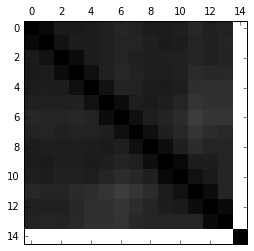

In [7]:
plt.matshow(np.array(matrix), fignum=100, cmap=plt.cm.gray)
plt.savefig(path + '/matrix.png')
plt.show()

In [2]:
corpus = session.query(Node).filter(Node.id==111107).first()
docs = (session.query(Node).filter( Node.parent_id==111107
                                  , Node.typename=="DOCUMENT"
                                  )
        .order_by(Node.hyperdata['publication_date'])
        .all()
        )

In [3]:
print("Le corpus %s contient %d documents." % (corpus.name, len(docs)))

Le corpus ALL (abeille* and (mort* or disparition)) contient 11282 documents.


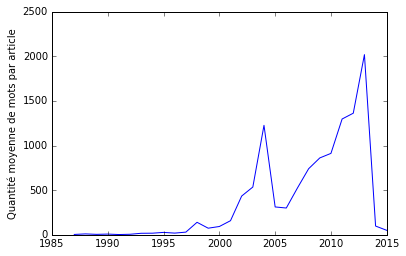

In [77]:
dico_docs = defaultdict(list)
for doc in docs:
    dico_docs[int(doc['publication_year'])].append(doc.hyperdata['title'])

x = list(dico_docs.keys())
y = [ len(ys) for ys in dico_docs.values()]
plt.ylabel('Quantité moyenne de mots par article')
plt.plot(x,y)

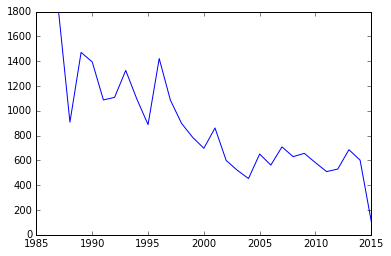

In [79]:
dico_words_length = defaultdict(list)
for doc in docs:
    number_words = len(word_tokenize(doc.hyperdata['title'] + doc.hyperdata['abstract']))
    dico_words_length[int(doc['publication_year'])].append(number_words)

x_length = list(dico_words_length.keys())
y_length = [mean(dico_words_length[k]) for k in dico_words_length.keys()]
plt.plot(x_length,y_length)

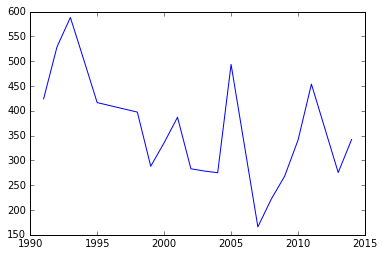

In [50]:
dico_words_set = defaultdict(list)
for doc in docs[:1000]:
    number_words = len(set(word_tokenize(doc.hyperdata['title'] + doc.hyperdata['abstract'])))
    dico_words_set[int(doc['publication_year'])].append(number_words)

x_set = list(dico_words_set.keys())
y_set = [mean(dico_words_set[k]) for k in dico_words_set.keys()]
plt.plot(x_set,y_set)


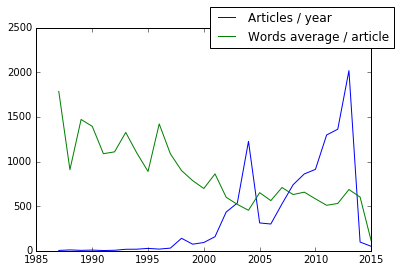

In [85]:
plt.plot(x,y,label='Articles / year')
#plt.plot(x_set,y_set)
plt.plot(x_length, y_length, label='Words average / article')
plt.legend(loc='center left', bbox_to_anchor=(0.5,1))
plt.savefig(path + '/historyQL.png')
plt.show()

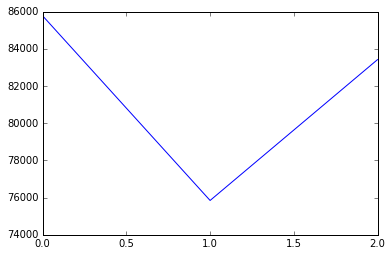

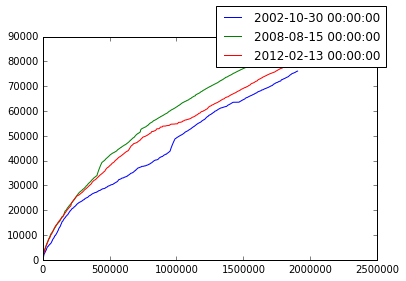

(0, ('2002-10-30 00:00:00', 85768.95087396505))
(1, ('2008-08-15 00:00:00', 75846.00918598552))
(2, ('2012-02-13 00:00:00', 83418.01639344262))


In [87]:
def homogeinity(docs, size=3, plot1=False, plot2=False):
    segment = round(len(docs) / size)
    
    dico = defaultdict(int)
    result1 = []
    result2 = []
    count = 0
    
    xxs,yys  = 0,0
    xs,ys = [],[]
    bag = set()
            
    for doc in docs:
        if count == 1:
            date = doc.hyperdata['publication_date']
            bag = set()
            
            xxs,yys  = 0,0
            xs,ys = [],[]
            
            
        elif count >= segment:
            wn = len(dico.keys())
            ws = sum(dico.values())
            
            result1.append((date, ws*count/wn))
            result2.append((xs, ys, str(date)))
            
            count = 0
            dico = defaultdict(int)
            

        
        words = word_tokenize(doc.hyperdata['title'] + doc.hyperdata['abstract'])
        
        for word in words:
            dico[word] = dico.get(word, 0) + 1
            
            xxs += 1
            
            if word not in bag:
                yys += 1
                bag.add(word)
            
            xs.append(xxs)
            ys.append(yys)
        
        count += 1
        
    if plot1 == True:
        x, y = [], []
        for xa, (label, ya) in enumerate(result1):
            x.append(xa)
            y.append(ya)
        plt.plot(x, y,label='homogeinity')
        plt.show()
        
    if plot2 == True:
        for x1, y1, label in result2:
            plt.plot(x1,y1,label=label)
        plt.legend(loc='center left', bbox_to_anchor=(0.5,1))
        plt.savefig(path + '/heterogeinity.png')
        plt.show()

    return(enumerate(result1))
        
for r in homogeinity(docs[1000:], plot1=True, plot2=True):
    print(r)

# Temporal TFIDF

In [20]:
def temporal_tfidf(corpus_id, start=None, end=None):
    
    doc_sum = (session.query(func.count(Node.id))
                  .filter(Node.parent_id == corpus_id)
                  .filter(Node.typename == 'DOCUMENT')
                  .all()
           )[0][0]
    #print("Somme des documents du corpus: %d" % doc_sum)
    
    mapList_id = (session.query(Node.id).filter(Node.parent_id==corpus_id)
                                    .filter(Node.typename=='MAPLIST')
                                    .first()
             )[0]
    #print("MapList_id : %d" % mapList_id)
    # do the groups
    
    Map = aliased(NodeNgram)

    idf = (session.query(Ngram.id, func.count(NodeNgram.node_id))
                     .join(NodeNgram, NodeNgram.ngram_id == Ngram.id)
                     .join(Node, NodeNgram.node_id == Node.id)
                     .join(Map, Map.ngram_id == Ngram.id)
              )
    
    tf = (session.query(Ngram.id, func.sum(NodeNgram.weight))
                     .join(NodeNgram, NodeNgram.ngram_id == Ngram.id)
                     .join(Node, NodeNgram.node_id == Node.id)
                     .join(Map, Map.ngram_id == Ngram.id)
              )
    
    if start is not None:
        #date_start = datetime.datetime.strptime ("2001-2-3 10:11:12", "%Y-%m-%d %H:%M:%S")
        # TODO : more complexe date format here.
        date_start = datetime.datetime.strptime (str(start), "%Y-%m-%d")
        date_start_utc = date_start.strftime("%Y-%m-%d %H:%M:%S")

        Start=aliased(NodeHyperdata)
        idf = (idf.join( Start, Start.node_id == Node.id)
                  .filter( Start.key == 'publication_date')
                  .filter( Start.value_utc >= date_start_utc)
              )
        
        tf = (tf.join( Start, Start.node_id == Node.id)
                 .filter( Start.key == 'publication_date')
                 .filter( Start.value_utc >= date_start_utc)
             )


    if end is not None:
        # TODO : more complexe date format here.
        date_end = datetime.datetime.strptime (str(end), "%Y-%m-%d")
        date_end_utc = date_end.strftime("%Y-%m-%d %H:%M:%S")

        End=aliased(NodeHyperdata)

        idf = (idf.join(End, End.node_id == Node.id)
                  .filter( End.key == 'publication_date')
                  .filter( End.value_utc <= date_end_utc )
              )

        tf = (tf.join(End, End.node_id == Node.id)
                  .filter( End.key == 'publication_date')
                  .filter( End.value_utc <= date_end_utc )
              )
    
    idf = (idf.filter(Node.parent_id == corpus_id)
              .filter(Node.typename == 'DOCUMENT')
              .filter(Map.node_id == mapList_id)
              .group_by(Ngram.id)
              #.limit(30)
          )
    
    tf = (tf.filter(Node.parent_id == corpus_id)
            .filter(Node.typename == 'DOCUMENT')
            .filter(Map.node_id == mapList_id)
            .group_by(Ngram.id)
            #.limit(30)
         )
    
    tf_dict  = defaultdict(int)
    idf_dict = defaultdict(int)
    tfidf_dict = defaultdict(float)
    
    for ngram_id, s in idf:
        #print(ngram_id, s)
        idf_dict[ngram_id] = log(int(doc_sum)/int(s))
    
    for ngram_id, s in tf:
        #print(ngram_id, s)
        tf_dict[ngram_id]  = s
        
    for ngram_id in tf_dict.keys():
        tfidf_dict[ngram_id] = tf_dict.get(ngram_id, 0) * idf_dict.get(ngram_id, 0)
        
    return(tfidf_dict)

In [28]:
import math
def cosine_similarity(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

v1,v2 = [3, 45, 7, 2], [2, 54, 13, 15]
print(v1, v2, cosine_similarity(v1,v2))

[3, 45, 7, 2] [2, 54, 13, 15] 0.97228425171235


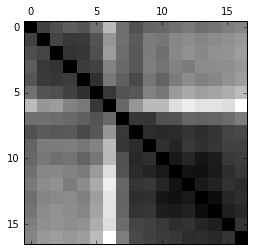

In [62]:
years = range(1998, 2016)
vecteurs_dict = defaultdict(dict)

for period in zip(years[:-1], years[1:]):
    vecteurs_dict[period[0]] = temporal_tfidf(corpus_id, start=str(period[0])+'-01-01', end=str(period[1])+'-01-01') 
    

set_words = set()

for year in vecteurs_dict.keys():
    for ngram_id in vecteurs_dict[year].keys():
        set_words.add(ngram_id)

sorted_ngram_ids= sorted(list(set_words))

vecteurs_list = defaultdict(list)

for year in vecteurs_dict.keys():
    vecteur = []
    for ngram_id in sorted_ngram_ids:
        vecteur.append(vecteurs_dict[year].get(ngram_id, 0))
    vecteurs_list[year] = vecteur


matrix = []
for year1 in vecteurs_list.keys():
    
    vecteur = []
    for year2 in vecteurs_list.keys():
        vecteur.append(1-cosine_similarity(vecteurs_list[year1],vecteurs_list[year2]))
    matrix.append(vecteur)

plt.matshow(np.array(matrix), fignum=100, cmap=plt.cm.gray)
plt.savefig(path + '/matrix.png')
plt.show()

In [ ]:
1998-2004
2005-2007
2008-2015

In [58]:
from periods import *

NameError: name 'distance' is not defined

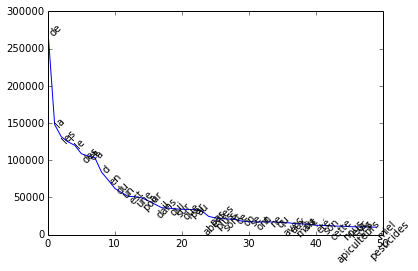

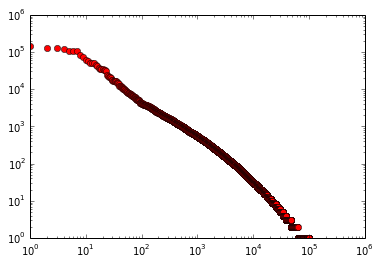

In [4]:
c.zipf(top=True)

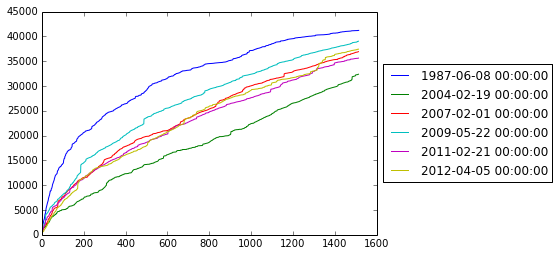

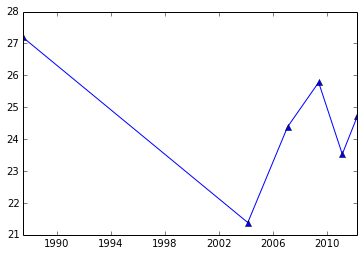

In [5]:
c.homogeinity(periods=7)

In [5]:
s = c.slice_sample(size=500)

In [6]:
from datetime import datetime as date
d = date.now()
words = gargantext.Ngrams()
words.get(s, lang='fr')
date.now() - d

datetime.timedelta(0, 44, 286598)

In [7]:
words.count()

1050 occurrences, 698 forms, 1.50429799427 avg


In [8]:
g = gargantext.Graph()
g.cooc(words, words)

(0, 0)


In [9]:
words.head()

AttributeError: 'Ngrams' object has no attribute 'sort_ngrams'

In [14]:
stems = list(words.stems.keys())
words.stems[stems[9]]

defaultdict(<class 'str'>, {'count': 1, 'context': {'WOS:000261906200079'}, 'grams': [[('applications', 'NNS'), ('Jmol', 'NNP')]]})

In [6]:
#p = gargantext.bdd.Pubmed()
#p.add('gargantext/data/pubmed/pubmed_result.xml')

In [6]:
corpus = gargantext.bdd.Europresse()
corpus.add("/home/alexandre/projets/abeilles/documents/Europresse/html/")

In [3]:
corpus_2004 = gargantext.bdd.Europresse()
corpus_2004.add("gargantext/data/html/html_french/")

In [39]:
#print("%s documents in the corpus, we need a samp<le for tests:" % (len(corpus.corpus)))
#bee.timeline(time=year/month/day, from=, to=)
#bee.sources()
#bee.wordEvolution()

test = gargantext.bdd.Europresse()
test.add("/home/alexandre/projets/ademe/Corpus/Europresse/html/")
#len(test.corpus)

In [308]:
from collections import Counter
import operator
import re

stop_words = ['givors', 'mercredis', 'nc', 'u', 'bouche', 'nez', 'vin']
stop_docs = ['erika', 'givors',]

def tf(data, stop_words=['stopwords',]):
    """
    data is a list of dict: gargantext.Corpus.corpus
    """
    text_all = ' '.join([a.get('text', '') for a in data])

    words = re.findall(r'\w+', text_all.lower())
    words = [x for x in words if not re.match(r'\d', x)]
    words = [x for x in words if x not in stop_words]

    c = Counter(words)
    total = sum([x for x in c.values()])

    tf = [(x[0], x[1]/total, x[1], total) for x in c.items()]
    tf.sort(key=lambda tup: tup[1], reverse=True)
    
    #XXX
    tfd = defaultdict(list) 
    for x in c.items():
        tfd[x[0]] = (x[1]/total, x[1], total)
    
    return(tfd)

#Counter(words).most_common(10)

def tfidf(tf, tf_temoin, part=20):
    tf1 = sorted(tf.items(), key=operator.itemgetter(1), reverse=True)
    tf2 = sorted(tf_temoin.items(), key=operator.itemgetter(1), reverse=True)
    
    result = dict()
    s = set([ x[0] for x in tf2[:round(len(tf2)*part/100)]])
    for c in tf1[:round(len(tf1)*part/100)]:
        if c[0] not in s:
            result[c[0]] = c[1][0]
    #result.sort(key=lambda tup: tup[1], reverse=True)
    result = sorted(result.items(), key=operator.itemgetter(1), reverse=True)
    return(result)

def specificities(data, test, part=20):
    c = tf(data)
    t = tf(test)
    spec = tfidf(c, t, part=part)
    return(spec)

In [416]:
def specificity_historic(term, plot=False):
    decoupes = slice_homogeneous(corpus, part=30)
    #del decoupes[0]
    r = [ tf(x) for x in decoupes ]
    d = [ x[0]['date'] for x in decoupes ]
    # = map(tf, decoupes)
    moyenne = []
    for x in r:
        try:
            moyenne.append(x[term][0])
        except:
            moyenne.append(0)
    m = average(moyenne)
    spec = [ x - m for x in moyenne ]
    #print(spec)
    if plot==True:
        plt.bar(np.array(d), np.array(spec))
    #plt.plot(np.array(d), np.arange())

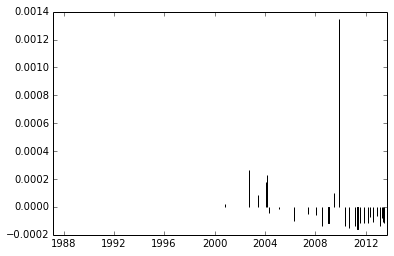

In [417]:
specificity_historic('précaution', plot=True)
# seuil à x
# si spec > x then print timeline
# (david)
#

In [310]:
specificites_global = specificities(corpus_2004.corpus, test.corpus, part=20)

In [311]:
print(specificites_global[:3])

[('abeilles', 0.0059870668700093901), ('régent', 0.0048882169995404807), ('gaucho', 0.0043776402920498768)]


In [252]:
slices = slice_homogeneous(corpus, part=50)

In [414]:
# XXX
#spec = specificities(corpus_an['2010'], test.corpus, part=20)
spec = list()
for sl in slices:
    sp = specificities(sl, test.corpus, part=20)
    spec.append((sl[0]['date'],sp[:3]))

In [418]:
def timeline():
    previous = set()
    current = set()
    old = []

    for n, y in enumerate(spec):

        current = set(x[0] for x in spec[n][1])
        new = []

        for t in current:
            if t not in previous and t not in old:
                old.append(t)
                new.append(t)

        print(spec[n][0], '+', new)

# zipf, répartition des principales occurrences
Prendre un corpus test (les flux rss de presse)
Extraire les principales occurences de chaque corpus
Pour en faire emerger les termes spécifiques de chaque corpus
(TF-IDF) puis spécificités temporelles

In [ ]:
# salem methods (lexico)
# calcul des spécificités historiques
# effet gutman AFC

In [11]:
# AFC methods: travail avec Ludovic Lebart et son fameux DTM-Vic => AFC en fortran
# https://pypi.python.org/pypi/MDP/2.3
# reinert methods
# (see iramuteq methods if needed)

s = i.sample(size=400)
words = gargantext.Ngrams()
words.get_ngrams(s, lang='fr')
# keys = ['text', 'title', 'keywords']

#words.remove_blackwords(blacklist)
#words.fusion_whiteliste(whitelist)
#words.fusion_synonyms(cvalue)
#words.tfidf('word') > list of documents

In [6]:
# words.stem

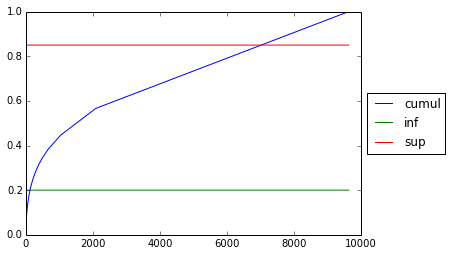

In [10]:
white_liste = words.filtre(inf=0.2, sup=0.85, n_min=2, plot=True)
#white_liste.first_ngrams()

In [11]:
graph = gargantext.Graph()
#graph.cooc(white_liste, white_liste, type='sum', inf=5, sup=20) #other type: tfidf
graph.cooc(white_liste, white_liste, type='sum', inf=2, sup=20) #other type: tfidf

(407, 407)


In [12]:
graph.distance(type='inclusion', threshold=0.2)

danc follow
southern brazil
waggl danc
food sourc
danc communic
social bee
stingless bee


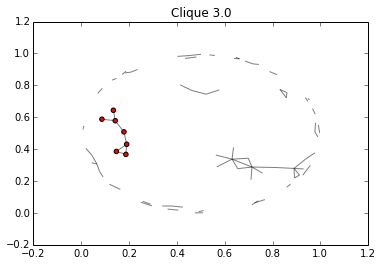

------------------------------
solitari bee
similar result
signific differ
bee speci


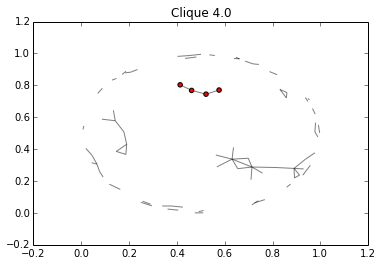

------------------------------
mobil phase
dissolut rate
mobil phase composit
develop model
elsevi b.v. all right
( c
activ pharmaceut ingredi


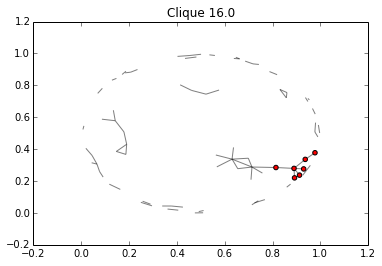

------------------------------
mushroom bodi
kenyon cell
antenn lobe
wiley period
olfactori pathway
nervous system
visual system
later part
olfactori system


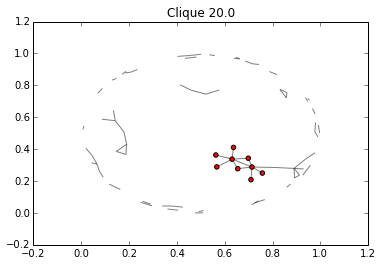

------------------------------
escherichia coli
staphylococcus aureus
honey sampl


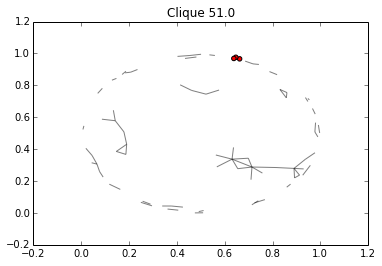

------------------------------
honey bee api mellifera
genom region
fruit fli
a. mellifera
first report
fruit product


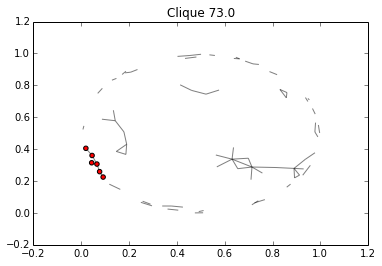

------------------------------
first experi
second experi
third experi


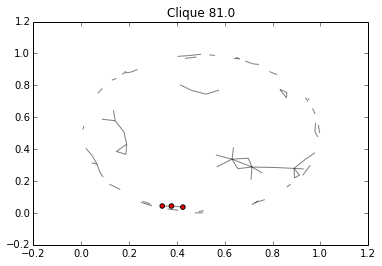

------------------------------
morpholog trait
elong factor
bodi size


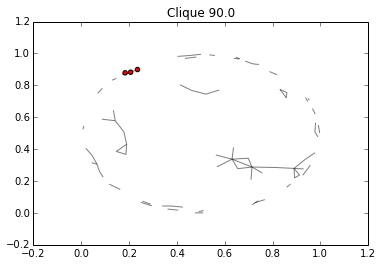

------------------------------
express level
quantit real-tim pcr
express profil


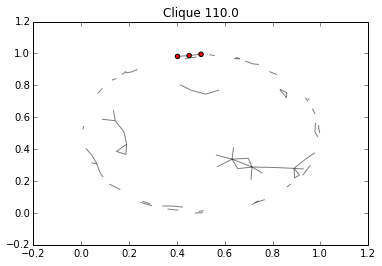

------------------------------
bee popul
brood area
honey product


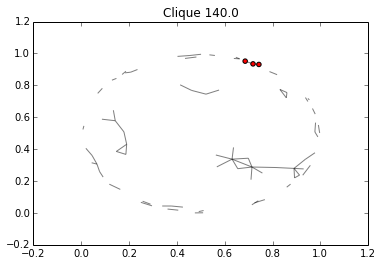

------------------------------
sucros stimul
probosci extens reflex
academ press


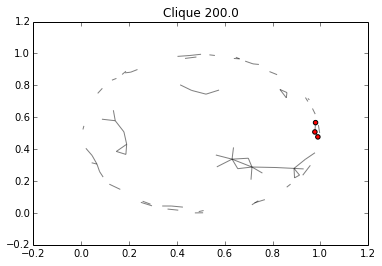

------------------------------
random complet block design
high outcross rate
natur outcross


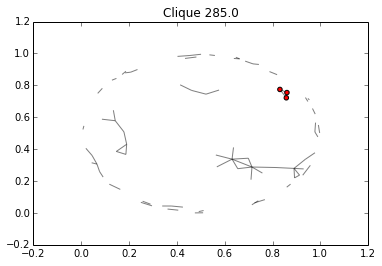

------------------------------


In [13]:
graph.draw(type='louvain', node_min=2)